In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch.utils.tensorboard import SummaryWriter  
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.decomposition import PCA


In [205]:
path = '/Users/iamyoungjin/Desktop/Nottingham Modules/Term1/ML/Assignment2/TrainDataset2023.xls'
df = pd.read_excel(path)
df = df.drop('ID', axis=1)

In [206]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 119 entries, pCR (outcome) to original_ngtdm_Strength
dtypes: float64(108), int64(11)
memory usage: 372.0 KB
None
       pCR (outcome)  RelapseFreeSurvival (outcome)         Age          ER  \
count     400.000000                     400.000000  400.000000  400.000000   
mean       12.697500                      56.000208   51.804674    0.547500   
std       111.107417                      27.137584   10.948522    0.498362   
min         0.000000                       0.000000   23.000000    0.000000   
25%         0.000000                      38.000000   44.516769    0.000000   
50%         0.000000                      55.000000   51.019507    1.000000   
75%         0.000000                      73.000000   60.000000    1.000000   
max       999.000000                     144.000000   79.603012    1.000000   

              PgR        HER2  TrippleNegative  ChemoGrade  Proliferation  \
count  400.00000

In [207]:
df

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,144.000000,41.0,0,0,0,1,3,3,1,...,0.517172,0.375126,3.325332,0.002314,3.880772e+06,473.464852,0.000768,0.182615,0.030508,0.000758
1,0,142.000000,39.0,1,1,0,0,3,3,1,...,0.444391,0.444391,3.032144,0.005612,2.372010e+06,59.459710,0.004383,0.032012,0.001006,0.003685
2,1,135.000000,31.0,0,0,0,1,2,1,1,...,0.534549,0.534549,2.485848,0.006752,1.540027e+06,33.935384,0.007584,0.024062,0.000529,0.006447
3,0,12.000000,35.0,0,0,0,1,3,3,1,...,0.506185,0.506185,2.606255,0.003755,6.936741e+06,46.859265,0.005424,0.013707,0.000178,0.004543
4,0,109.000000,61.0,1,0,0,0,2,1,1,...,0.462282,0.462282,2.809279,0.006521,1.265399e+06,39.621023,0.006585,0.034148,0.001083,0.005626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,54.500000,58.5,1,0,1,0,3,2,1,...,0.476493,0.476493,2.453583,0.003229,2.327038e+06,18.562377,0.013766,0.018042,0.000288,0.012257
396,0,49.250000,34.3,0,0,0,1,3,3,1,...,0.418382,0.418382,2.995603,0.004243,1.005061e+06,156.627179,0.002228,0.136015,0.022148,0.002098
397,0,48.500000,53.3,0,0,0,1,2,1,1,...,0.527779,0.527778,1.500000,0.003728,2.132007e+05,0.996746,0.252582,0.007380,0.000037,0.231059
398,0,47.500000,68.8,1,0,0,0,3,3,1,...,0.313693,0.313693,3.573557,0.001112,2.008034e+07,204.864200,0.001372,0.054063,0.003697,0.001368


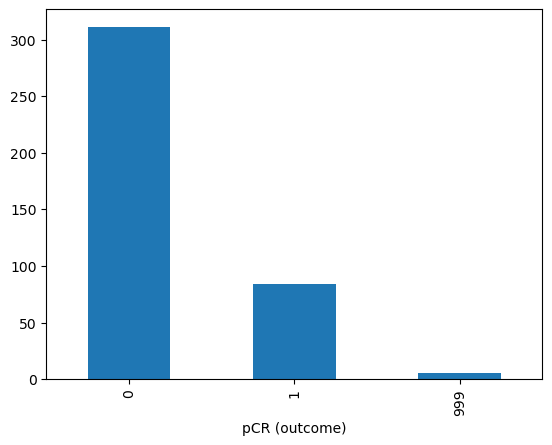

In [208]:
df['pCR (outcome)'].value_counts().plot(kind='bar')
plt.show()

### Handling missing values

In [209]:
# change "999" to NaN
df.replace(999, pd.NA, inplace=True)

# Finding missing value 
columns_with_missing_values = df.columns[df.isnull().any()]
print("Columns which has missing values:", columns_with_missing_values)

Columns which has missing values: Index(['pCR (outcome)', 'PgR', 'HER2', 'TrippleNegative', 'ChemoGrade',
       'Proliferation', 'HistologyType', 'LNStatus'],
      dtype='object')


In [210]:
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

for column, value in missing_data.items():
    if value != 0:
        print(f"colum:{column}, {missing_data[column]}")
        print(f"colum:{column}, {missing_percentage[column]}%")

colum:pCR (outcome), 5
colum:pCR (outcome), 1.25%
colum:PgR, 1
colum:PgR, 0.25%
colum:HER2, 1
colum:HER2, 0.25%
colum:TrippleNegative, 1
colum:TrippleNegative, 0.25%
colum:ChemoGrade, 3
colum:ChemoGrade, 0.75%
colum:Proliferation, 2
colum:Proliferation, 0.5%
colum:HistologyType, 3
colum:HistologyType, 0.75%
colum:LNStatus, 1
colum:LNStatus, 0.25%


In [211]:
missing_data = df.isnull().sum()
df = df.dropna()

### Unbalnaced labels

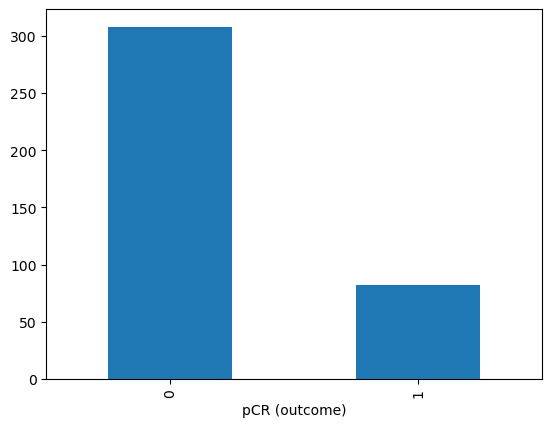

In [212]:
df['pCR (outcome)'].value_counts().plot(kind='bar')
plt.show()

### Normalisation
- Ordinal Variable : Label Encoder(3)(ChemoGrade, Proliferation, TumourStage)   
- Binary Variables: One-hot Encoder(6)(ER,PgR,HER2,TrippleNegative,HistologyType,LNStatus)   
- The others : MinMax Scaler   

In [213]:
pCR_label = df['pCR (outcome)'] # Classlification Label
RelapseFreeSurvival_label = df['RelapseFreeSurvival (outcome)'] # Regression Label
df = df.drop(['pCR (outcome)', 'RelapseFreeSurvival (outcome)'], axis=1)

In [214]:
df

,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,41.0,0,0,0,1,3,3,1,1,2,...,0.517172,0.375126,3.325332,0.002314,3.880772e+06,473.464852,0.000768,0.182615,0.030508,0.000758
1,39.0,1,1,0,0,3,3,1,1,2,...,0.444391,0.444391,3.032144,0.005612,2.372010e+06,59.459710,0.004383,0.032012,0.001006,0.003685
2,31.0,0,0,0,1,2,1,1,0,2,...,0.534549,0.534549,2.485848,0.006752,1.540027e+06,33.935384,0.007584,0.024062,0.000529,0.006447
3,35.0,0,0,0,1,3,3,1,1,3,...,0.506185,0.506185,2.606255,0.003755,6.936741e+06,46.859265,0.005424,0.013707,0.000178,0.004543
4,61.0,1,0,0,0,2,1,1,0,2,...,0.462282,0.462282,2.809279,0.006521,1.265399e+06,39.621023,0.006585,0.034148,0.001083,0.005626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,58.5,1,0,1,0,3,2,1,1,4,...,0.476493,0.476493,2.453583,0.003229,2.327038e+06,18.562377,0.013766,0.018042,0.000288,0.012257
396,34.3,0,0,0,1,3,3,1,0,2,...,0.418382,0.418382,2.995603,0.004243,1.005061e+06,156.627179,0.002228,0.136015,0.022148,0.002098
397,53.3,0,0,0,1,2,1,1,0,2,...,0.527779,0.527778,1.500000,0.003728,2.132007e+05,0.996746,0.252582,0.007380,0.000037,0.231059
398,68.8,1,0,0,0,3,3,1,1,3,...,0.313693,0.313693,3.573557,0.001112,2.008034e+07,204.864200,0.001372,0.054063,0.003697,0.001368


In [215]:
missing_data = df.isnull().sum()
print("the number of missing value:")
print(missing_data)

thenumber of missing value:
Age                          0
ER                           0
PgR                          0
HER2                         0
TrippleNegative              0
                            ..
original_ngtdm_Busyness      0
original_ngtdm_Coarseness    0
original_ngtdm_Complexity    0
original_ngtdm_Contrast      0
original_ngtdm_Strength      0
Length: 117, dtype: int64


In [216]:
df

,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,41.0,0,0,0,1,3,3,1,1,2,...,0.517172,0.375126,3.325332,0.002314,3.880772e+06,473.464852,0.000768,0.182615,0.030508,0.000758
1,39.0,1,1,0,0,3,3,1,1,2,...,0.444391,0.444391,3.032144,0.005612,2.372010e+06,59.459710,0.004383,0.032012,0.001006,0.003685
2,31.0,0,0,0,1,2,1,1,0,2,...,0.534549,0.534549,2.485848,0.006752,1.540027e+06,33.935384,0.007584,0.024062,0.000529,0.006447
3,35.0,0,0,0,1,3,3,1,1,3,...,0.506185,0.506185,2.606255,0.003755,6.936741e+06,46.859265,0.005424,0.013707,0.000178,0.004543
4,61.0,1,0,0,0,2,1,1,0,2,...,0.462282,0.462282,2.809279,0.006521,1.265399e+06,39.621023,0.006585,0.034148,0.001083,0.005626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,58.5,1,0,1,0,3,2,1,1,4,...,0.476493,0.476493,2.453583,0.003229,2.327038e+06,18.562377,0.013766,0.018042,0.000288,0.012257
396,34.3,0,0,0,1,3,3,1,0,2,...,0.418382,0.418382,2.995603,0.004243,1.005061e+06,156.627179,0.002228,0.136015,0.022148,0.002098
397,53.3,0,0,0,1,2,1,1,0,2,...,0.527779,0.527778,1.500000,0.003728,2.132007e+05,0.996746,0.252582,0.007380,0.000037,0.231059
398,68.8,1,0,0,0,3,3,1,1,3,...,0.313693,0.313693,3.573557,0.001112,2.008034e+07,204.864200,0.001372,0.054063,0.003697,0.001368


In [217]:
columns_minmax_encode = ['Age'] + df.columns[10:].tolist()
columns_onehot_encode = df.columns[1:5].tolist() + df.columns[7:9].tolist()
columns_label_encode = df.columns[5:7].tolist() + [df.columns[9]]

# Min-Max Scaling 
scaler = MinMaxScaler()
df[columns_minmax_encode] = scaler.fit_transform(df[columns_minmax_encode])

# One-Hot Encoding
df = pd.get_dummies(df, columns=columns_onehot_encode)

# Label Encoding
label_encoder = LabelEncoder()
for col in columns_label_encode:
    df[col] = label_encoder.fit_transform(df[col])


In [218]:
df

,Age,ChemoGrade,Proliferation,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,...,PgR_0,PgR_1,HER2_0,HER2_1,TrippleNegative_0,TrippleNegative_1,HistologyType_1,HistologyType_2,LNStatus_0,LNStatus_1
0,0.318004,2,2,1,0.797297,0.807835,0.210203,0.064814,0.177801,0.111986,...,True,False,True,False,False,True,True,False,False,True
1,0.282670,2,2,1,0.622626,0.487408,0.174967,0.098719,0.277216,0.125706,...,False,True,True,False,True,False,True,False,False,True
2,0.141335,1,0,1,0.597765,0.640311,0.185818,0.076236,0.144991,0.119956,...,True,False,True,False,False,True,True,False,True,False
3,0.212003,2,2,2,0.746394,0.519793,0.242475,0.129083,0.381256,0.139637,...,True,False,True,False,False,True,True,False,False,True
4,0.671342,1,0,1,0.852989,0.841683,0.171992,0.047070,0.146778,0.076833,...,True,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.627175,2,1,3,0.295630,0.222072,0.097730,0.124656,0.250212,0.045014,...,True,False,False,True,True,False,True,False,False,True
396,0.199636,2,2,1,0.917529,0.811094,0.150243,0.041609,0.131280,0.072839,...,True,False,True,False,False,True,True,False,True,False
397,0.535307,1,0,1,0.612128,0.449973,0.033609,0.020185,0.034485,0.015777,...,True,False,True,False,False,True,True,False,True,False
398,0.809144,2,2,2,0.887548,0.954371,0.298907,0.079991,0.208189,0.134006,...,True,False,True,False,True,False,True,False,False,True


In [219]:
# df = pd.concat([df, pCR_label], axis=1)
# df = pd.concat([df, RelapseFreeSurvival_label], axis=1)
# df

In [220]:
# NAN check
total_nan_cnt = df.isnull().sum().sum()
total_nan_cnt

0

In [221]:
# Define the MLP model with dropout
class MLP1(nn.Module):
    def __init__(self,input_shape,dropout_rate=0.2):
        super(MLP1, self).__init__()
        self.fc1 = nn.Linear(input_shape, 64)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=dropout_rate)  
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=dropout_rate)  
        self.fc3 = nn.Linear(32, 2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x
    
    
# Define the MLP model
class MLP(nn.Module):
    def __init__(self,input_shape):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_shape, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

ACC: 0.6794871794871795


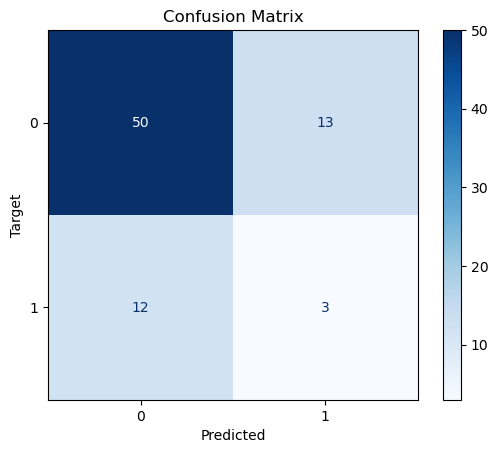

In [222]:
X = df.values
y = pCR_label.values

X = X.astype(np.float32) 
y = y.astype(np.int64)    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)


epochs = 60
input_shape = X_train.shape[1]
model1 = MLP1(input_shape)
#model = MLP(input_shape)
criterion1 = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)

for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model1(inputs)
        loss = criterion1(outputs, labels)
        loss.backward()
        optimizer.step()
    
with torch.no_grad():
    model1.eval()
    outputs = model1(X_test_tensor)
    predicted = torch.argmax(outputs, dim=1)
    acc = accuracy_score(y_test_tensor, predicted)
    print(f'ACC: {acc}')

    cm = confusion_matrix(y_test_tensor,predicted)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix")
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    plt.show()

#### Analysis Correlation

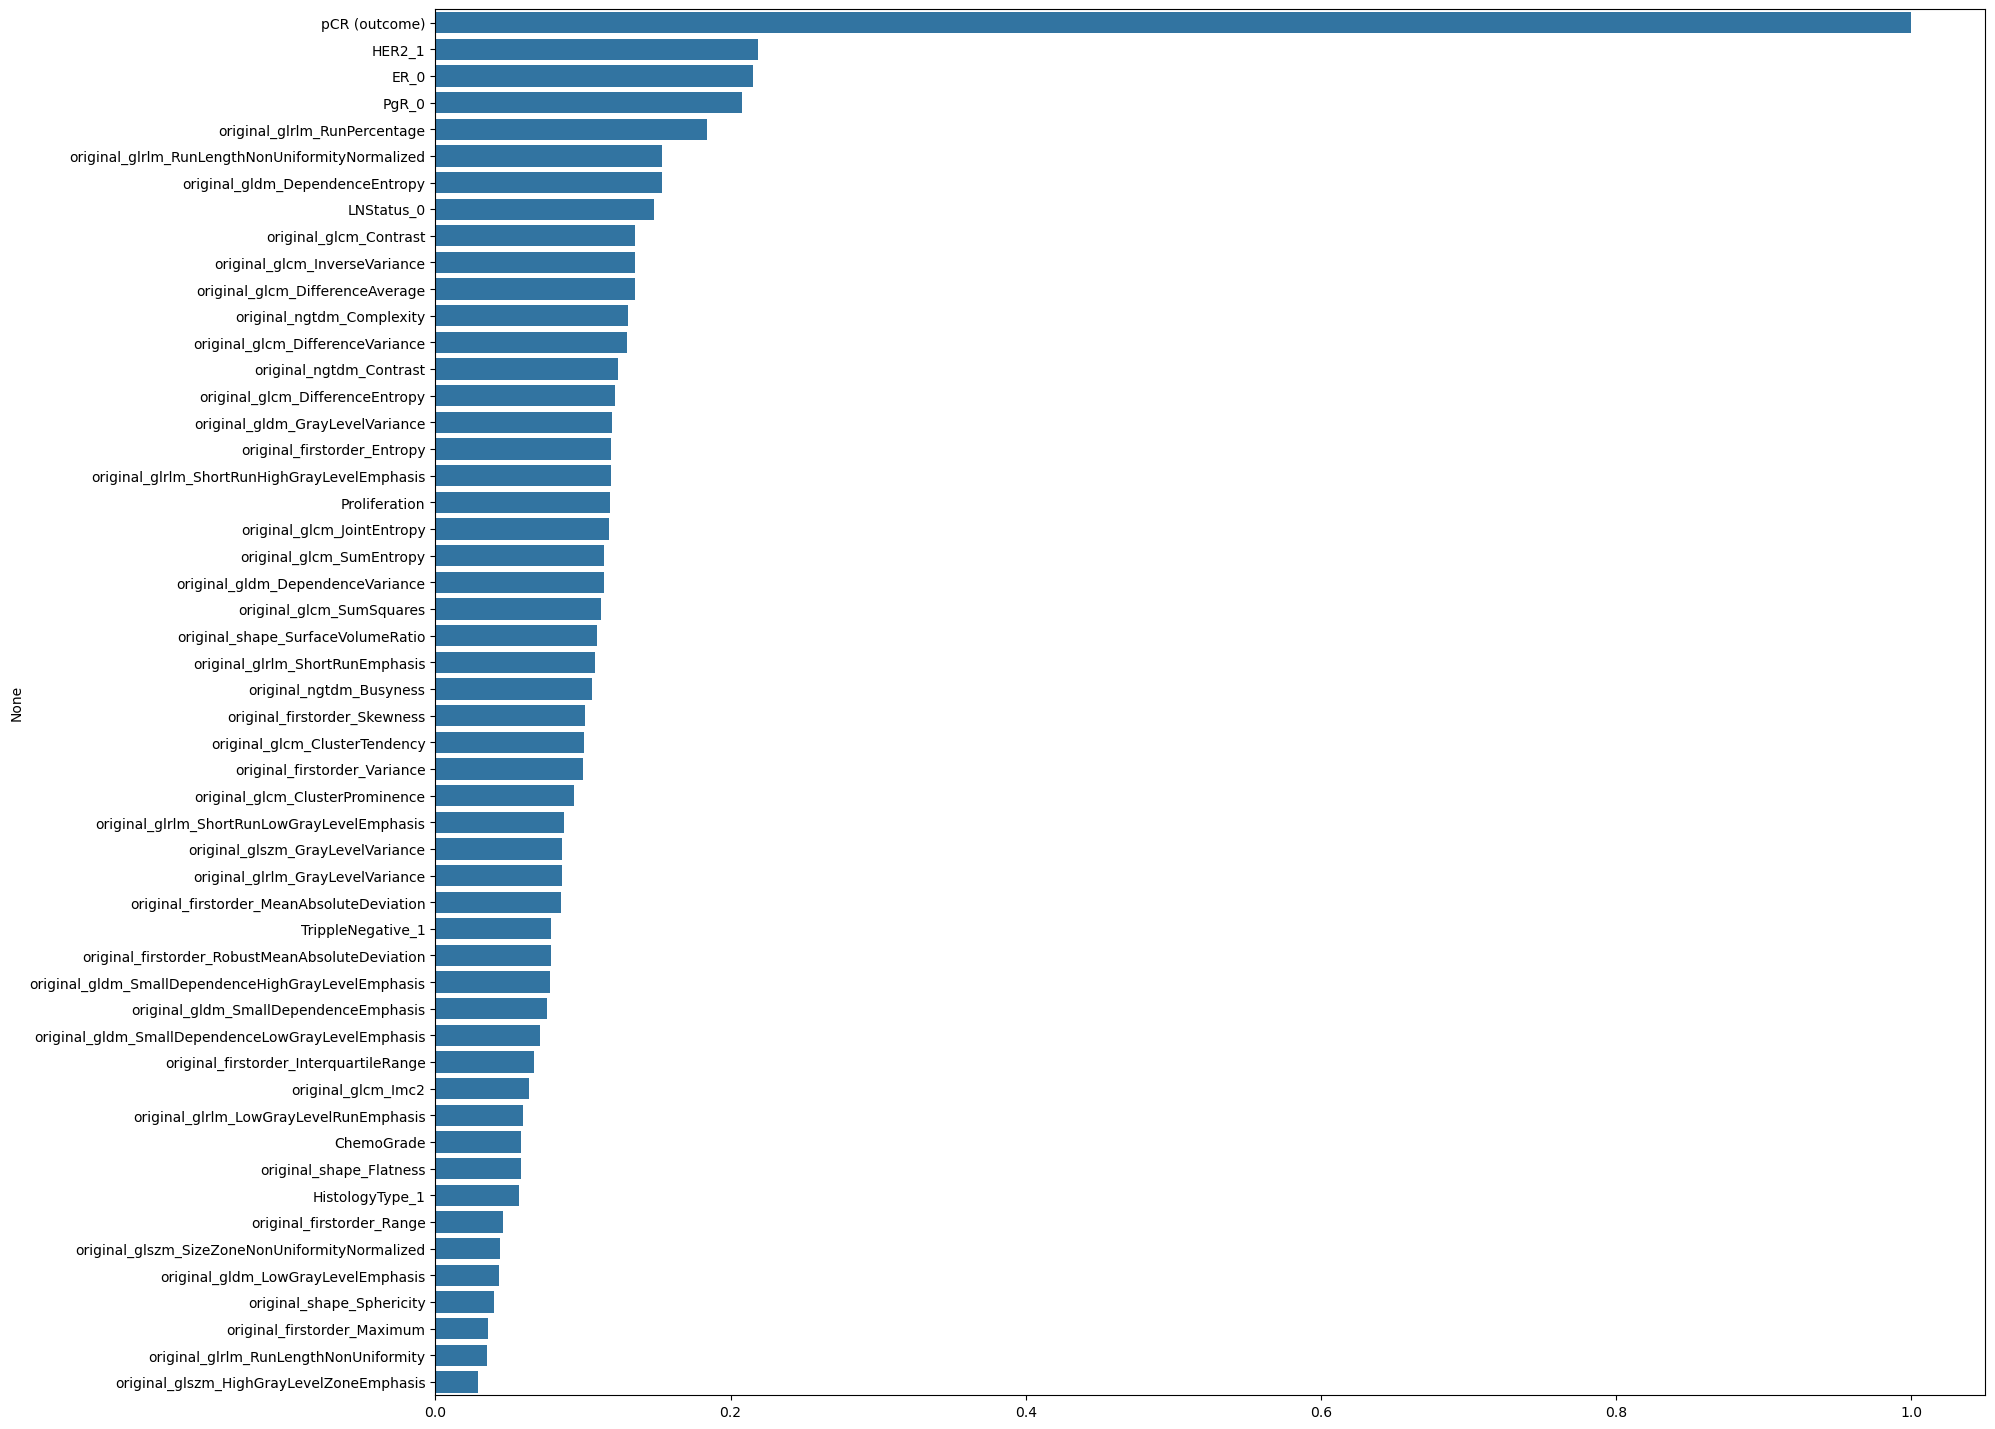

In [223]:
# target = ['pCR (outcome)', 'RelapseFreeSurvival (outcome)' ]
target = ['pCR (outcome)']

high_corr_lst = []
for idx in range(len(target)):
    if idx == 0:
        df = pd.concat([df, pCR_label],axis=1)
    else:
        df = pd.concat([df, RelapseFreeSurvival_label], axis=1)
    corr_matrix = df.corr()
    
    threshold = 0.02

    col = corr_matrix[target[idx]] >= threshold
    high_corr_columns = corr_matrix.columns[col]
    high_corr_lst.append(high_corr_columns)

    high_corr_matrix = df[high_corr_columns].corr()
    # print(high_corr_matrix)
    order = high_corr_matrix.loc[target[idx]].sort_values(ascending=False).index

    plt.figure(figsize=(20, 18))
    sns.barplot(x=high_corr_matrix.loc[target[idx]].loc[order].values, y=order)
    plt.show()


In [224]:
len(high_corr_lst[0])
df_high_corr = df[high_corr_columns]

ACC: 1.0


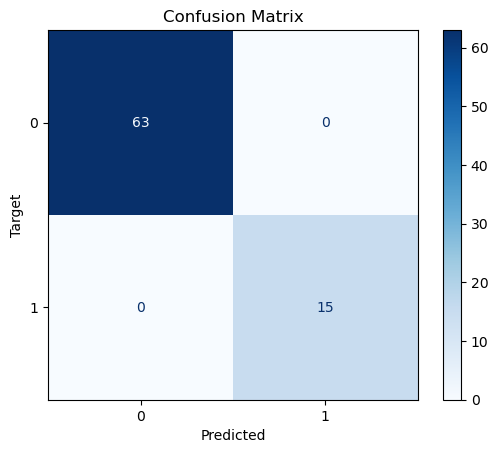

In [225]:
X = df_high_corr.values
y = pCR_label.values

X = X.astype(np.float32)  
y = y.astype(np.int64)    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

epochs = 60
input_shape = X_train.shape[1]
model2 = MLP1(input_shape)
criterion2 = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=0.001)

for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model2(inputs)
        loss = criterion2(outputs, labels)
        loss.backward()
        optimizer.step()

with torch.no_grad():
    model2.eval()
    outputs = model2(X_test_tensor)
    predicted = torch.argmax(outputs, dim=1)
    acc = accuracy_score(y_test_tensor, predicted)
    print(f'ACC: {acc}')

    cm = confusion_matrix(y_test_tensor,predicted)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix")
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    plt.show()

#### There is a multicollinearity problem since there are many columns and correlations to label are too low.


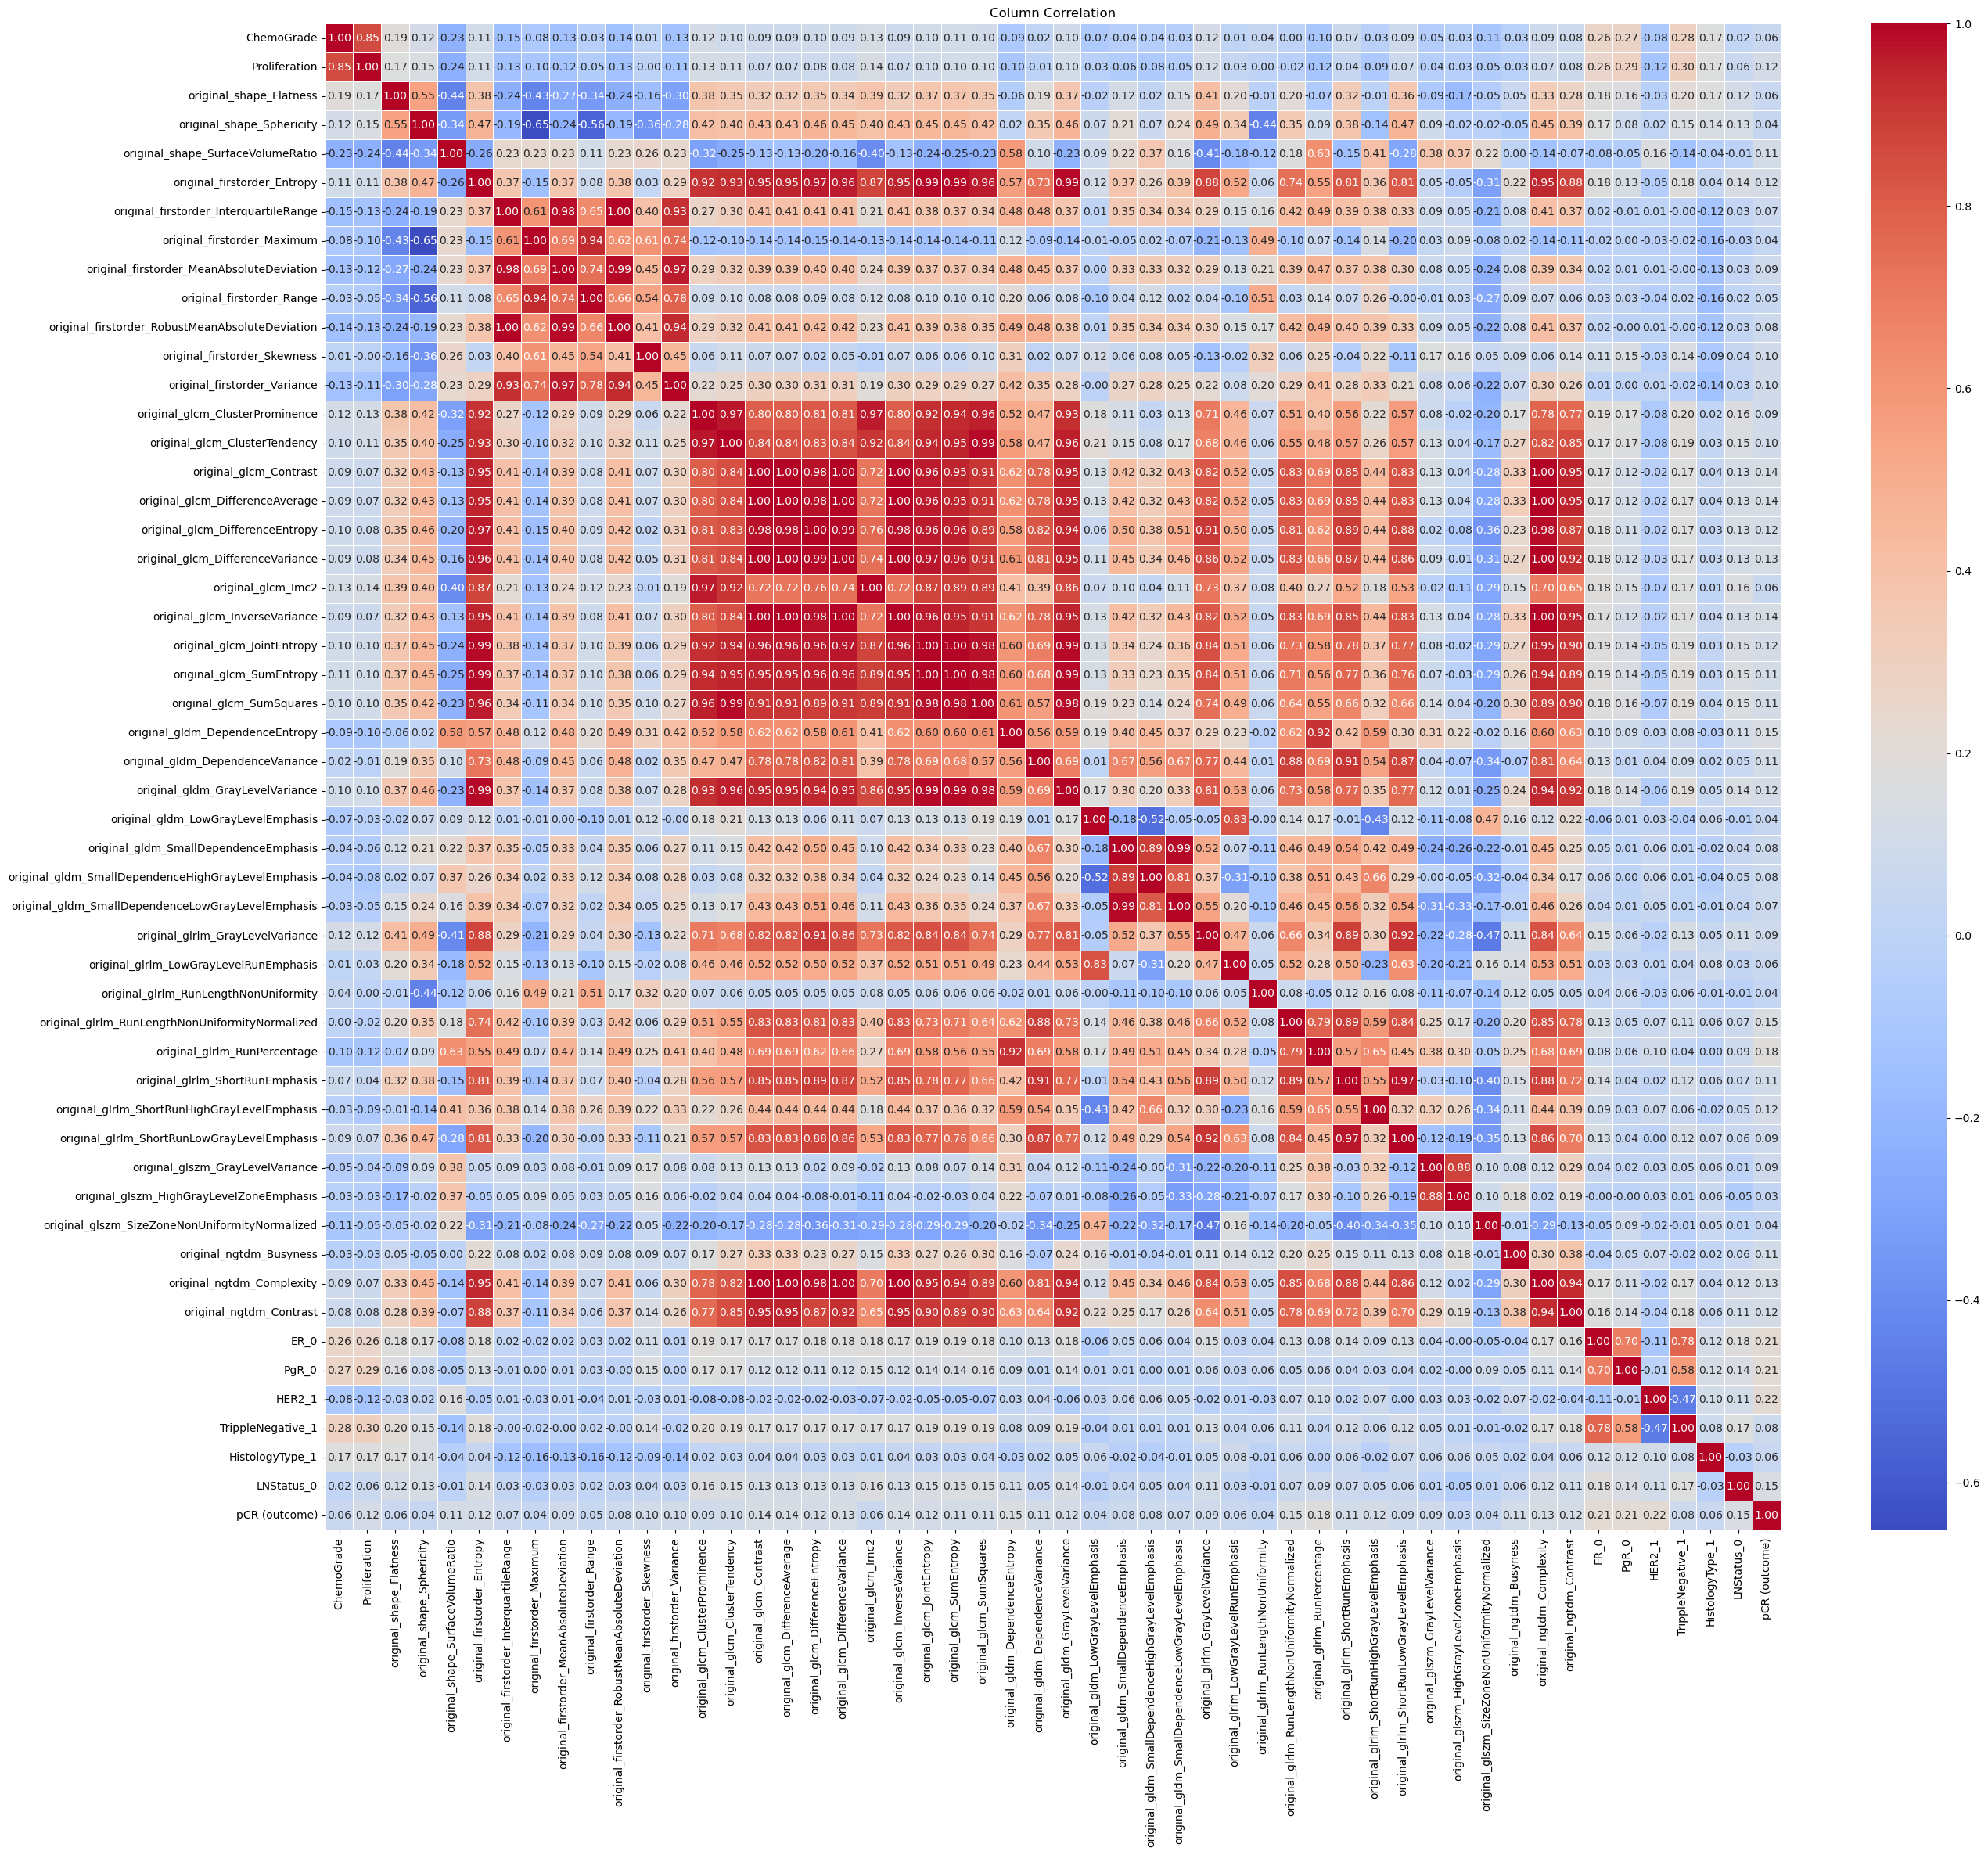

In [226]:
# Check the multicoollinearity columns
high_corr_matrix = df[high_corr_columns].corr()
plt.figure(figsize=(30, 25))
sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Column Correlation')
plt.show()

In [227]:
#TODO: Handle above multicollinearity column

In [228]:
non_corr_columns = df.columns.drop(high_corr_columns)
pca_cols = df[non_corr_columns]

pca = PCA(n_components=10)
new_cols = pca.fit_transform(pca_cols)

pc_columns = [f'PC_{i}' for i in range(10)]  
pca_df = pd.DataFrame(data=new_cols, columns=pc_columns)
df = df.drop(non_corr_columns, axis=1)

#FIXME
df = pd.concat([df.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1) 
# df= pd.concat([df,pca_df],axis=1)
print(df.isna().sum())


ChemoGrade                           0
Proliferation                        0
original_shape_Flatness              0
original_shape_Sphericity            0
original_shape_SurfaceVolumeRatio    0
                                    ..
PC6                                  0
PC7                                  0
PC8                                  0
PC9                                  0
PC10                                 0
Length: 62, dtype: int64


In [229]:
df

,ChemoGrade,Proliferation,original_shape_Flatness,original_shape_Sphericity,original_shape_SurfaceVolumeRatio,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Range,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,2,2,0.807835,0.843485,0.173167,0.809830,0.079285,0.034601,0.000000,0.078645,...,1.251332,-0.729551,0.795580,-0.337545,-0.666462,0.424673,-0.027964,-0.098756,-0.000640,0.138158
1,2,2,0.487408,0.617438,0.275973,0.197378,0.190898,0.220220,0.159700,0.244539,...,0.076747,0.898446,-0.490477,-0.078942,-0.673029,-0.094315,-0.365809,-0.133074,-0.098294,-0.212311
2,1,0,0.640311,0.623758,0.316123,0.149420,0.114904,0.218491,0.088120,0.234455,...,0.838863,-0.687187,-0.817907,0.158452,0.120036,-0.438713,-0.205480,-0.116327,-0.349073,-0.193081
3,2,2,0.519793,0.444105,0.290049,0.095607,0.194394,0.132099,0.118780,0.132102,...,-0.296445,-0.988425,-0.697933,0.360270,-0.399190,0.203256,-0.338933,-0.086033,-0.187783,-0.127589
4,1,0,0.841683,0.822724,0.245059,0.201519,0.210715,0.055958,0.122448,0.059431,...,0.482642,0.325849,-0.506986,-0.155753,0.178089,-0.409322,-0.346036,-0.039780,-0.294257,0.269933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2,1,0.222072,0.577849,0.405083,0.119319,0.171265,0.145889,0.113169,0.137235,...,-1.475033,-0.076911,-0.180651,-0.000829,0.477707,0.841801,-0.071646,0.007313,-0.343070,0.298870
386,2,2,0.811094,0.614837,0.417651,0.767629,0.507728,0.184457,0.449797,0.295938,...,1.304577,-0.795837,0.627971,-0.331294,0.020512,-0.316511,0.055717,-0.094097,-0.124724,-0.102308
387,1,0,0.449973,0.707049,0.817894,0.046960,0.442117,0.195426,0.343148,0.143440,...,0.865032,-0.560382,-0.923415,0.508145,0.175576,-0.185647,0.878826,-0.234676,-0.446809,0.076809
388,2,2,0.954371,0.826109,0.107688,0.416100,0.238754,0.145665,0.199073,0.236284,...,-0.444165,-0.042346,0.377816,-0.070986,-0.380720,0.210665,-0.505523,-0.088774,0.177595,0.602540


### Model

In [230]:
# pCR_label = df['pCR (outcome)'] # Classlification Label
# # RelapseFreeSurvival_label = df['RelapseFreeSurvival (outcome)'] # Regression Label
# df = df.drop(['pCR (outcome)'], axis=1)

ACC: 1.0


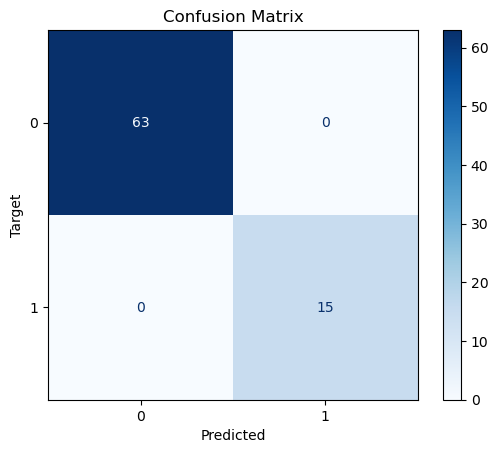

In [231]:
X = df.values
y = pCR_label.values

X = X.astype(np.float32)  
y = y.astype(np.int64)   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

epochs = 60
input_shape = X_train.shape[1]
model3 = MLP1(input_shape)
criterion3 = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3.parameters(), lr=0.001)

for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model3(inputs)
        loss = criterion3(outputs, labels)
        loss.backward()
        optimizer.step()

with torch.no_grad():
    model3.eval()
    outputs = model3(X_test_tensor)
    predicted = torch.argmax(outputs, dim=1)
    acc = accuracy_score(y_test_tensor, predicted)
    print(f'ACC: {acc}')

    cm = confusion_matrix(y_test_tensor,predicted)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix")
    plt.xlabel("Prediction")    
    plt.ylabel("Target")
    plt.show()